Let's pad in missing values for the Kalman filter.  


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-pastel')
# from statsmodels.tsa.vector_ar.var_model importrt VAR

In [2]:
df = pd.read_csv("hurricanes_augmented.csv", parse_dates=["Date"])

In [3]:
df

,id,Name,Date_string,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,Date,sst,Lat,Long,oni_score,oni_flag
0,AL012007,ANDREA,20070506,1200,,EX,35.5,-74.0,35,1012,2007-05-06,22.991250,36,-74,-0.3,0
1,AL012007,ANDREA,20070506,1800,,EX,35.0,-73.0,40,1009,2007-05-06,21.806250,35,-73,-0.3,0
2,AL012007,ANDREA,20070507,0,,EX,34.3,-71.7,50,1005,2007-05-07,21.414999,34,-72,-0.3,0
3,AL012007,ANDREA,20070507,600,,EX,33.3,-72.3,65,998,2007-05-07,20.699999,33,-72,-0.3,0
4,AL012007,ANDREA,20070507,1200,,EX,32.3,-73.1,65,998,2007-05-07,20.180624,32,-73,-0.3,0
5,AL012007,ANDREA,20070507,1800,,EX,31.5,-74.0,65,998,2007-05-07,21.098125,32,-74,-0.3,0
6,AL012007,ANDREA,20070508,0,,EX,31.0,-74.9,55,1000,2007-05-08,21.783125,31,-75,-0.3,0
7,AL012007,ANDREA,20070508,600,,EX,30.7,-76.0,50,1001,2007-05-08,21.114374,31,-76,-0.3,0
8,AL012007,ANDREA,20070508,1200,,EX,30.4,-77.2,50,1001,2007-05-08,23.751875,30,-77,-0.3,0
9,AL012007,ANDREA,20070508,1800,,EX,30.4,-77.9,50,1001,2007-05-08,24.596874,30,-78,-0.3,0


In [4]:
df['Date_Time'] = pd.to_datetime(df.Date, format = '%d/%m/%Y %H:%M')

In [5]:
df

,id,Name,Date_string,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,Date,sst,Lat,Long,oni_score,oni_flag,Date_Time
0,AL012007,ANDREA,20070506,1200,,EX,35.5,-74.0,35,1012,2007-05-06,22.991250,36,-74,-0.3,0,2007-05-06
1,AL012007,ANDREA,20070506,1800,,EX,35.0,-73.0,40,1009,2007-05-06,21.806250,35,-73,-0.3,0,2007-05-06
2,AL012007,ANDREA,20070507,0,,EX,34.3,-71.7,50,1005,2007-05-07,21.414999,34,-72,-0.3,0,2007-05-07
3,AL012007,ANDREA,20070507,600,,EX,33.3,-72.3,65,998,2007-05-07,20.699999,33,-72,-0.3,0,2007-05-07
4,AL012007,ANDREA,20070507,1200,,EX,32.3,-73.1,65,998,2007-05-07,20.180624,32,-73,-0.3,0,2007-05-07
5,AL012007,ANDREA,20070507,1800,,EX,31.5,-74.0,65,998,2007-05-07,21.098125,32,-74,-0.3,0,2007-05-07
6,AL012007,ANDREA,20070508,0,,EX,31.0,-74.9,55,1000,2007-05-08,21.783125,31,-75,-0.3,0,2007-05-08
7,AL012007,ANDREA,20070508,600,,EX,30.7,-76.0,50,1001,2007-05-08,21.114374,31,-76,-0.3,0,2007-05-08
8,AL012007,ANDREA,20070508,1200,,EX,30.4,-77.2,50,1001,2007-05-08,23.751875,30,-77,-0.3,0,2007-05-08
9,AL012007,ANDREA,20070508,1800,,EX,30.4,-77.9,50,1001,2007-05-08,24.596874,30,-78,-0.3,0,2007-05-08


In [6]:
df.index = df.Date

In [7]:
df

,id,Name,Date_string,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,Date,sst,Lat,Long,oni_score,oni_flag,Date_Time
Date,,,,,,,,,,,,,,,,,
2007-05-06,AL012007,ANDREA,20070506,1200,,EX,35.5,-74.0,35,1012,2007-05-06,22.991250,36,-74,-0.3,0,2007-05-06
2007-05-06,AL012007,ANDREA,20070506,1800,,EX,35.0,-73.0,40,1009,2007-05-06,21.806250,35,-73,-0.3,0,2007-05-06
2007-05-07,AL012007,ANDREA,20070507,0,,EX,34.3,-71.7,50,1005,2007-05-07,21.414999,34,-72,-0.3,0,2007-05-07
2007-05-07,AL012007,ANDREA,20070507,600,,EX,33.3,-72.3,65,998,2007-05-07,20.699999,33,-72,-0.3,0,2007-05-07
2007-05-07,AL012007,ANDREA,20070507,1200,,EX,32.3,-73.1,65,998,2007-05-07,20.180624,32,-73,-0.3,0,2007-05-07
2007-05-07,AL012007,ANDREA,20070507,1800,,EX,31.5,-74.0,65,998,2007-05-07,21.098125,32,-74,-0.3,0,2007-05-07
2007-05-08,AL012007,ANDREA,20070508,0,,EX,31.0,-74.9,55,1000,2007-05-08,21.783125,31,-75,-0.3,0,2007-05-08
2007-05-08,AL012007,ANDREA,20070508,600,,EX,30.7,-76.0,50,1001,2007-05-08,21.114374,31,-76,-0.3,0,2007-05-08
2007-05-08,AL012007,ANDREA,20070508,1200,,EX,30.4,-77.2,50,1001,2007-05-08,23.751875,30,-77,-0.3,0,2007-05-08


In [8]:
data = df.drop(['Date_Time', 'Date_string', 'Date'], axis=1)

In [9]:
data

,id,Name,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,sst,Lat,Long,oni_score,oni_flag
Date,,,,,,,,,,,,,,
2007-05-06,AL012007,ANDREA,1200,,EX,35.5,-74.0,35,1012,22.991250,36,-74,-0.3,0
2007-05-06,AL012007,ANDREA,1800,,EX,35.0,-73.0,40,1009,21.806250,35,-73,-0.3,0
2007-05-07,AL012007,ANDREA,0,,EX,34.3,-71.7,50,1005,21.414999,34,-72,-0.3,0
2007-05-07,AL012007,ANDREA,600,,EX,33.3,-72.3,65,998,20.699999,33,-72,-0.3,0
2007-05-07,AL012007,ANDREA,1200,,EX,32.3,-73.1,65,998,20.180624,32,-73,-0.3,0
2007-05-07,AL012007,ANDREA,1800,,EX,31.5,-74.0,65,998,21.098125,32,-74,-0.3,0
2007-05-08,AL012007,ANDREA,0,,EX,31.0,-74.9,55,1000,21.783125,31,-75,-0.3,0
2007-05-08,AL012007,ANDREA,600,,EX,30.7,-76.0,50,1001,21.114374,31,-76,-0.3,0
2007-05-08,AL012007,ANDREA,1200,,EX,30.4,-77.2,50,1001,23.751875,30,-77,-0.3,0


In [10]:
data.tail()

,id,Name,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,sst,Lat,Long,oni_score,oni_flag
Date,,,,,,,,,,,,,,
2017-11-08,AL192017,RINA,1200,,TS,38.3,-48.8,45,994,22.681250,38,-49,-0.9,-1
2017-11-08,AL192017,RINA,1800,,TS,40.1,-49.0,45,992,23.260624,40,-49,-0.9,-1
2017-11-09,AL192017,RINA,0,,TS,41.8,-48.8,45,991,15.672500,42,-49,-0.9,-1
2017-11-09,AL192017,RINA,600,,LO,43.6,-48.0,40,993,11.883750,44,-48,-0.9,-1
2017-11-09,AL192017,RINA,1200,,LO,45.5,-47.0,40,995,8.805625,46,-47,-0.9,-1


Text(0.5,1,'Sea Surface Temperature')

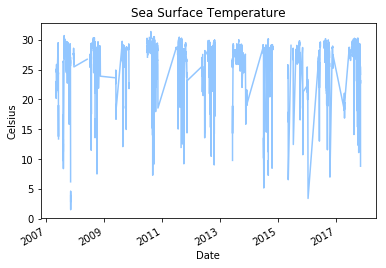

In [11]:
data.sst.plot()
plt.ylabel('Celsius')
plt.title("Sea Surface Temperature")

Text(0.5,1,'Min Pressure')

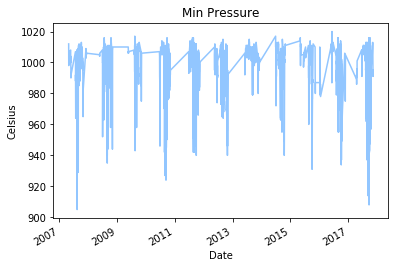

In [13]:
data['MinimumPressure'].plot()
plt.ylabel('Celsius')
plt.title("Min Pressure")

Text(0.5,1,'Max Wind')

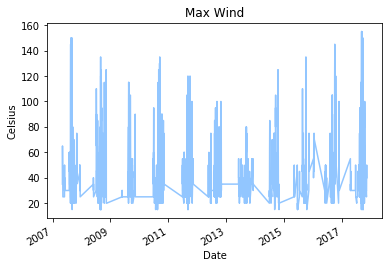

In [15]:
data['MaxiumWind'].plot()
plt.ylabel('Celsius')
plt.title("Max Wind")

I note the gaps in between where we have inconsistent time intervas for each hurricane season. I don't think linear interpolation is suitable -- maybe filling in with 0s is better like the `traces` package defines those missing observations in signal processing.  

So let me just first play around with the Kalman filter code and get familiar with it.  
